## 1. Importando Bibliotecas e Dataset de imagens 'mnist'

In [1]:
import numpy # importa biblioteca para manipulação de matrizes
from matplotlib import pyplot as plt # importa biblioteca para criação de gráficos

# Bibliotecas do keras (Para Deep Learning)
from keras.datasets import mnist      # importa o dataset mnist
from keras.models import Sequential   # importa um modelo sequencial
from keras.layers import Dense        # importa camadas totalmente conectadas 
from keras.layers import Dropout      # importa a estrutura de dropout
from keras.utils import np_utils      # importa biblioteca de utilidades do keras

## 2. Separação em Dados de Treino e de Teste

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # importa o dataset Mnist da biblioteca Keras

# imprime o tamanho do vetor
print(X_train.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)


## 3. Exploração de dados 

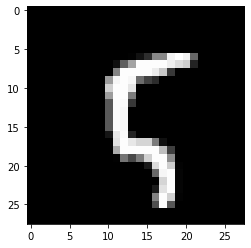

O número da imagem é: 5


In [5]:
first_image = X_train[100] # obtém a imagem de treino no índice 100 do vetor

# realiza manipulação dos dados da imagem
first_image = numpy.array(first_image, dtype ='float')
pixels = first_image.reshape((28,28))

# exibe a imagem do vetor
plt.imshow(pixels, cmap='gray')
plt.show()

# imprime o label da imagem de treino do índice 100
print('O número da imagem acima é:',y_train[100])

Preciso pegar a quantidade de pixels que cada imagem possui pois isso determinará a quantidade de Neurônios de Entrada (Input Layer) que teremos.

In [13]:
# Calculando o total de pixels da imagem, multiplicando as suas dimensões
num_pixels = X_train.shape[1] * X_train.shape[2]
print('Número de pixels em cada imagem:',num_pixels)

# Transforma os valores dos pixels para float32
X_train2 = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test2 = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# Normalizando os valores dos pixels entre 0 e 1
X_train2 = X_train2 / 255
X_test2 = X_test2 / 255

Número de pixels em cada imagem: 784


In [9]:
# Transformando nossos labels em categóricos para podermos usá-los como uma matriz
# Em outras palavras, estamos transformando o y em ONE HOT VECTOR
y_train_h = np_utils.to_categorical(y_train)
y_test_h = np_utils.to_categorical(y_test)

# Vamos ver um Exemplo: vimos anteriormente que o número no índice 100 é 5, agora veremos ele representado no formato de matriz
print('O número do índice 100 é:',y_train[100])
print('O número do índice 100 no formato de matriz é:',y_train_h[100])

O número do índice 100 é: 5
O número do índice 100 no formato de matriz é: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [15]:
# Obtendo o número de classes do problema, que será igual ao número de neurônios na camada de saída (output layer)
num_classes = y_train_h.shape[1]

print(num_classes)

10


## 4. Criação do modelo de Rede Neural

In [16]:
# Criando o Modelo Sequencial de RNA
model = Sequential([
    Dense(units=1024, kernel_initializer='normal', input_dim=num_pixels, activation='relu'), # 1ª camada
    Dense(units=2048, kernel_initializer='normal', activation='relu'), # 2ª camada
    Dense(units=num_classes,kernel_initializer='normal', activation='softmax') # Camada de Saída
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_2 (Dense)             (None, 10)                20490     
                                                                 
Total params: 2,923,530
Trainable params: 2,923,530
Non-trainable params: 0
_________________________________________________________________


## 5. Treinamento do modelo

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # compila o modelo criado
result = model.fit(X_train2, y_train_h, validation_data=(X_test2,y_test_h), epochs=20, verbose=1, batch_size = 100) # executa o treinamento

Epoch 1/20
600/600 [==============================] - 8s 4ms/step - loss: 0.1808 - accuracy: 0.9454 - val_loss: 0.1043 - val_accuracy: 0.9676
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0696 - accuracy: 0.9785 - val_loss: 0.0749 - val_accuracy: 0.9767
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0460 - accuracy: 0.9851 - val_loss: 0.0732 - val_accuracy: 0.9791
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0347 - accuracy: 0.9885 - val_loss: 0.0893 - val_accuracy: 0.9733
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.0711 - val_accuracy: 0.9798
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0229 - accuracy: 0.9928 - val_loss: 0.0782 - val_accuracy: 0.9813
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0256 - accuracy: 0.9919 - val_loss: 0.0991 - val_accuracy: 0.9744
Epoch 

A partir do modelo já treinado, farei um teste vendo o resultado que ele me gera para a imagem de índice 100, que vimos anteriormente ser o número 5.

In [22]:
# obtém a imagem número 100
x = X_train2[100]
print(x.shape)

# Transformando em 2 dimensões (vetor)
x = numpy.expand_dims(x, axis=0)
print(x.shape)

print('-'*60)

# Usaremos o .predict para prever qual o número que o modelo achará para esse índice 100
# OBS.: Precisamos passar um vetor para essa função, por isso usamos o numpy para transformar a imagem em vetor
print('Resultado em formato de matriz:',model.predict(x))

print('-'*60)

# Função argmax abaixo pega o maior valor de um conjunto que eu passo para ele. Com essa função veremos o número que o modelo achou
print('Resultado para o índice 100:',numpy.argmax(model.predict(x))) 

(784,)
(1, 784)
------------------------------------------------------------
1/1 [==============================] - 0s 23ms/step
Resultado em formato de matriz: [[5.6034882e-11 2.0244221e-12 2.6173508e-11 3.9535903e-09 2.7833211e-17
  9.9973160e-01 5.2156149e-05 1.3772785e-14 2.1501111e-04 1.1754117e-06]]
------------------------------------------------------------
1/1 [==============================] - 0s 22ms/step
Resultado para o índice 100: 5


Nota-se que o resultado do modelo pode ser interpretado como a probabilidade de uma imagem pertencer a uma das 10 classes disponíveis (números de 0 a 9).

Neste caso, ao colhermos o resultado do modelo para o índice 100, ele nos retorna com uma matriz onde a 6ª casa (correspondente ao número 5) possui o maior valor.